Best Alpha (Regularization Strength): 0.10309925681079525
Non-zero coefficients: 10


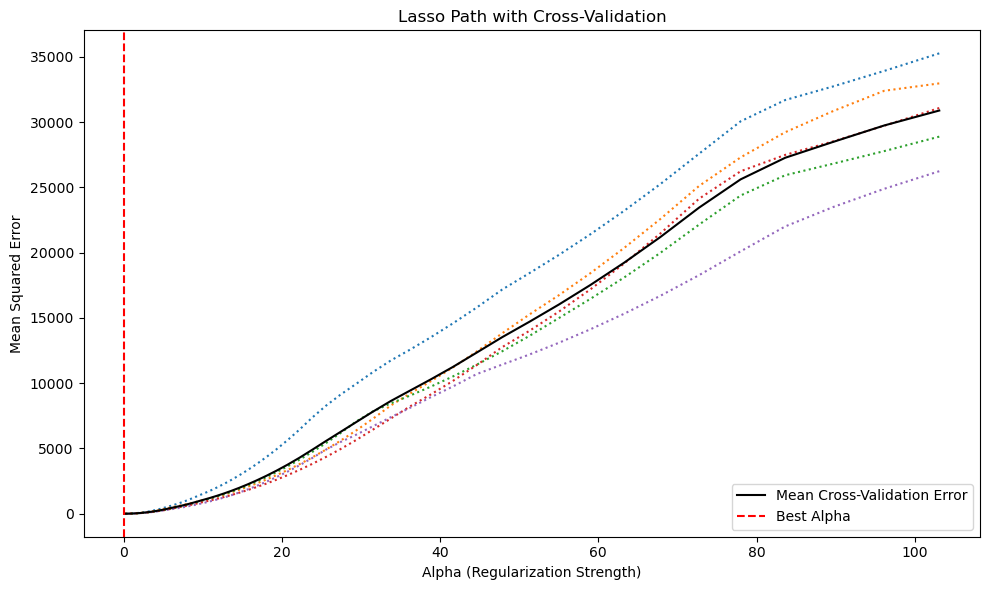

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Generating a synthetic dataset for regression
X, y = make_regression(n_samples=200, n_features=10, noise=0.1, random_state=42)

# Convert to DataFrame for better visualization and manipulation
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(10)])
df['Target'] = y

# Define the features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Perform Lasso regression with cross-validation
lasso = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation

# Fit the model
lasso.fit(X, y)

# Output performance
print(f"Best Alpha (Regularization Strength): {lasso.alpha_}")
print(f"Non-zero coefficients: {np.sum(lasso.coef_ != 0)}")

# Plot the Lasso path to visualize coefficients as alpha changes
plt.figure(figsize=(10, 6))
plt.plot(lasso.alphas_, lasso.mse_path_, ':')
plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=-1), label='Mean Cross-Validation Error', color='black')
plt.axvline(x=lasso.alpha_, linestyle='--', color='red', label="Best Alpha")
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Path with Cross-Validation')
plt.legend()
plt.tight_layout()
plt.show()
